# Projet fin d'étude optimisation algoritmique

## Binôme :
###  - AhmedSeyfeddine GOUMEIDA - MLDS
###  - Mohammed Erifai MAAMIR - MLDS

# EXERCICE 1

## 1)  Descente gradient à pas fixe : 


###  1.1) Définition des vecteurs :

In [123]:
import math 
from astropy.table import QTable, Table, Column
from astropy import units as u
import numpy as np
#--------------------------------------------------------------------------------
class XVector(object):
    def __init__(self, x1, x2):
        self.x1 = x1
        self.x2 = x2
        
class YVector(object):
    def __init__(self, y1):
        self.y1 = y1  

###  1.2) Cas d'une dérivée donnée ( gradient donné ) :

In [124]:
#-------------------------LA DERIVE DONNEE --------------------------------------
def f(X):
    return (X.x1-2)**2+(X.x2-3)**2
def df(X):
    return 2*(X.x1-2) , 2*(X.x2-3) #composantes du gradient : df/dx , df/dy


In [125]:
def descente_gradient_pas_fixe(f, df, X, alpha=1e-2, eps=1e-5, maxIter=1000):
    # Recherche le minimum d'une fonction f par descente de gradient
    # df doit être la dérivée de f ( le gradient)
    # X est le valeur initial
    # alpha est le taux d'apprentissage qui détermine la rapidité de la descente (par défaut 1/100)
    # eps est la précision souhaitée (par défaut 1/100000)
    # maxIter est le nombre maximum d'itération (par défaut 1000)
    
    gradx1, gradx2 = df(X)
    grad = math.sqrt(gradx1**2+gradx2**2) # norme du gradient (math.sqrt est la racine carrée)
    i=0
        
    Xhistory = Table(names=('x1', 'x2', 'ETAPE'), dtype=('f8', 'f8', 'i4'))
    Xhistory.add_row((X.x1, X.x2, 0))
    Yhistory = Table(names=('Y', 'ETAPE'), dtype=('f8', 'i4'))
    Yhistory.add_row((f(X), 0))
    
    while abs(grad)>eps: # tant que la pente n'est pas approximativement nulle
        gradx1, gradx2 = df(X) # on calcule la pente
        grad = math.sqrt(gradx1**2+gradx2**2) # norme du gradient
        X.x1 = X.x1-alpha*gradx1 # on effectue un petit pas vers le bas selon x1
        X.x2 = X.x2-alpha*gradx2 # on effectue un petit pas vers le bas selon X2
        i += 1
        Xhistory.add_row((X.x1, X.x2, i))#  cette ligne pour imprimer les itérations
        Yhistory.add_row((f(X), i)) #  cette ligne pour imprimer les itérations
        if i > maxIter:
            return None # on abandonne si le nombre d'itérations est trop élevé
    return Xhistory,Yhistory


###  - Un test sur la fonction " descente_gradient_pas_fixe (...)" le gradient donnée



In [126]:
#--------------------------------- TEST-----------------------------------------------
X = XVector(0, 0)
Y = YVector(0)
#------------------------------- Descente1--------------------------------------------
print("---  descente_gradient_pas_fixe ----")
X, fX = descente_gradient_pas_fixe(f, df, X)
print("------------    X    -------------")
print("----------------------------------")
print(X)
print("----------------------------------")
print("------------   fX    -------------")
print("----------------------------------")
print(fX)


---  descente_gradient_pas_fixe ----
------------    X    -------------
----------------------------------
         x1                  x2         ETAPE
------------------- ------------------- -----
                0.0                 0.0     0
               0.04                0.06     1
0.07919999999999999 0.11879999999999999     2
           0.117616            0.176424     3
0.15526368000000002          0.23289552     4
       0.1921584064        0.2882376096     5
     0.228315238272      0.342472857408     6
0.26374893350656003    0.39562340025984     7
0.29847395483642886  0.4477109322546432     8
0.33250447573970027  0.4987567136095503     9
                ...                 ...   ...
 1.9999966961990254  2.9999950442985375   659
  1.999996762275045   2.999995143412567   660
  1.999996827029544  2.9999952405443158   661
 1.9999968904889531  2.9999953357334292   662
  1.999996952679174  2.9999954290187607   663
 1.9999970136255907  2.9999955204383855   664
  1.999997073353079

###  1.3) Cas d'une dérivée non donnée ( gradient non donné ) :

In [127]:
#----------------------DERIVE NON DONNEE-------------------------------------------------------
def g(x1,x2):
    return (x1-2)**2+(x2-3)**2

def descente_gradient_pas_fixe_2(g, X, alpha=1e-2, eps=1e-5, maxIter=1000):
    # Recherche le minimum d'une fonction f par descente de gradient avec dérivée numérique
    # X est le valeur initial
    # alpha est le taux d'apprentissage qui détermine la rapidité de la descente (par défaut 1/100)
    # eps est la précision souhaitée (par défaut 1/100000)
    # maxIter est le nombre maximum d'itération (par défaut 1000)    
    
    grad = 1
    i=0
    
    Xhistory = Table(names=('x1', 'x2', 'ETAPE'), dtype=('f8', 'f8', 'i4'))
    Xhistory.add_row((X.x1, X.x2, 0))
    Yhistory = Table(names=('Y', 'ETAPE'), dtype=('f8', 'i4'))
    Yhistory.add_row((g(X.x1, X.x2), 0))
    
    while abs(grad)>eps:
        gradx1 = (g(X.x1+eps,X.x2)-g(X.x1-eps,X.x2))/(2*eps) #approximation numérique de la dérivée df/dx1
        gradx2 = (g(X.x1, X.x2+eps)-g(X.x1, X.x2-eps))/(2*eps) #approximation numérique de la dérivée df/dx2
        grad = math.sqrt(gradx1**2+gradx2**2) # norme du gradient
        X.x1 = X.x1-alpha*gradx1 # on effectue un petit pas vers le bas selon x1
        X.x2 = X.x2-alpha*gradx2 # on effectue un petit pas vers le bas selon x2
        i += 1
        Xhistory.add_row((X.x1, X.x2, i))#  cette ligne pour imprimer les itérations
        Yhistory.add_row((g(X.x1, X.x2), i)) #  cette ligne pour imprimer les itérations
        if i > maxIter:
            return None # on abandonne si le nombre d'itérations est trop élevé
    return Xhistory,Yhistory



###  - Un test sur la fonction " descente_gradient_pas_fixe_2(...)"  le gradient non donnée


In [128]:
#--------------------------------- TEST-----------------------------------------------
X = XVector(0, 0)
Y = YVector(0)
#-------------------  descente_gradient_pas_fixe_2-  ----------------------------------
print("--- descente_gradient_pas_fixe_2 --")
X, gX = descente_gradient_pas_fixe_2(g, X)
print("------------    X    -------------")
print("----------------------------------")
print(X)
print("----------------------------------")
print("------------   gX    -------------")
print("----------------------------------")
print(gX)

--- descente_gradient_pas_fixe_2 --
------------    X    -------------
----------------------------------
         x1                  x2          ETAPE
------------------- -------------------- -----
                0.0                  0.0     0
0.04000000000026205 0.060000000000393065     1
  0.079200000000057  0.11880000000097367     2
0.11761599999982053  0.17642400000106304     3
0.15526367999907364  0.23289552000171906     4
0.19215840639930093  0.28823760960250405     5
0.22831523827182565  0.34247285741084704     6
0.26374893350666895    0.395623400263112     7
0.29847395483706407   0.4477109322573724     8
 0.3325044757405138  0.49875671361299106     9
                ...                  ...   ...
 1.9999966961990254    2.999995044298539   659
  1.999996762275045   2.9999951434125682   660
  1.999996827029544   2.9999952405443167   661
 1.9999968904889531     2.99999533573343   662
  1.999996952679174   2.9999954290187616   663
 1.9999970136255907   2.9999955204383864   664
 

## 2) Preuve que f1 et f2 satisfont les conditions du théorème de convergence de l'algorithme de descente de gradient à pas fixe :

## 3) test et plot des fonction f1 et f2 :

### 3.1) Un test sur les deux fonction f1 et f2 " descente_gradient_pas_fixe_2(...)" gradient non donné :

### - test de la fonction f1:

In [129]:
#--------------           test f1            ----------------
def f1(x1,x2):
    return (((x1)**2)+(2*(x2)**2)+(x1*x2)+x1-x2+30)

#---------   descente_gradient_pas_fixe_2 de f1 -------------
X = XVector(3, 3)
print("------------descente_gradient_pas_fixe_2-------------")
X, f1X = descente_gradient_pas_fixe_2(f1, X)
print("------------    X    -------------")
print("----------------------------------")
print(X)
print("----------------------------------")
print("------------   f1(X)    -------------")
print("----------------------------------")
print(f1X)
print("----------------------------------")
print("xmin: x*=(",X[-1]['x1'],",",X[-1]['x2'],")")
print("----------------------------------")

------------descente_gradient_pas_fixe_2-------------
------------    X    -------------
----------------------------------
         x1                  x2         ETAPE
------------------- ------------------- -----
                3.0                 3.0     0
  2.899999999989575     2.8600000000053     1
  2.803399999990461   2.726600000006016     2
  2.710065999988018   2.599502000005913     3
 2.6198696599876143  2.4784212600045237     4
 2.5326880541881565   2.363085713003585     5
 2.4484034359700786  2.2532354039411757     6
  2.366903013211072   2.148621953423799     7
  2.288078733410856  2.0490080451550625     8
   2.21182707829459  1.9541669360093579     9
                ...                 ...   ...
-0.7142790856030672  0.4285686828832098   797
-0.7142791907207595  0.4285687264234923   798
-0.7142792941704528   0.428568769272772   799
-0.7142793959805687 0.42856881144348336   800
-0.7142794961741998  0.4285688529445082   801
 -0.714279594779768   0.428568893788281   802
-0

### - test de la fonction f2:

In [130]:
#--------------           test f2            ----------------
def f2(x1,x2):
    return ((x1)**2+10*(x2)**2)

#------   descente_gradient_pas_fixe_2 de f2  ---------------
X = XVector(3, 3)   #X0(3,3)
print("--  descente_gradient_pas_fixe_2 ---")
X, f2X = descente_gradient_pas_fixe_2(f2, X)
print("------------    X    -------------")
print("----------------------------------")
print(X)
print("----------------------------------")
print("------------   f2(X)    -------------")
print("----------------------------------")
print(f2X)
print("----------------------------------")
print("xmin: x*=(",X[-1]['x1'],",",X[-1]['x2'],")")
print("----------------------------------")

--  descente_gradient_pas_fixe_2 ---
------------    X    -------------
----------------------------------
          x1                     x2          ETAPE
---------------------- --------------------- -----
                   3.0                   3.0     0
     2.939999999995166     2.399999999994293     1
      2.88119999999725    1.9199999999911483     2
    2.8235759999971606    1.5359999999872116     3
    2.7671044799965046    1.2287999999872596     4
    2.7117623903957195    0.9830399999869428     5
    2.6575271425882647    0.7864319999891762     6
    2.6043765997359998    0.6291455999914959     7
     2.552289067740851    0.5033164799942398     8
    2.5012432863861207     0.402653183995902     9
                   ...                   ...   ...
5.9438857741977265e-06 4.367513634912215e-22   650
 5.825008058713772e-06 4.367513634912215e-22   651
 5.708507897539497e-06 4.367513634912215e-22   652
 5.594337739588707e-06 4.367513634912215e-22   653
 5.482450984796933e-06 4.3

### 3.2) plot de la fonction f2 :

### - préparation des données pour la fonction plot_fun :

In [131]:
def f_allY(X):
    tmp = []
    for i in range(len(X[0])):
        tmp.append (f2(X[0][i],X[1][i]))
    return np.array(tmp)

X1max=X[1]['x1']
X1min=X[-1]['x1']
print('X1 MIN     : ',X1min)

X2max=X[1]['x2']
X2min=X[-1]['x2']
print('X2 MIN     : ',X2min)

Ymax=f2X[1]['Y']
Ymin=f2X[-1]['Y']
print('Y  MIN     : ',Ymin)

dom=[X1min,X1max,X2min,X2max]
dom2=[-10,10,-10,10]
T2Lignes=[X['x1'], X['x2']]
print(X['x1'])
print(X['x2'])


X1 MIN     :  4.856587433342696e-06
X2 MIN     :  4.367513634912215e-22
Y  MIN     :  2.3586441497702193e-11
          x1          
----------------------
                   3.0
     2.939999999995166
      2.88119999999725
    2.8235759999971606
    2.7671044799965046
    2.7117623903957195
    2.6575271425882647
    2.6043765997359998
     2.552289067740851
    2.5012432863861207
                   ...
5.9438857741977265e-06
 5.825008058713772e-06
 5.708507897539497e-06
 5.594337739588707e-06
 5.482450984796933e-06
 5.372801965100994e-06
 5.265345925798975e-06
 5.160039007282995e-06
 5.056838227137335e-06
 4.955701462594588e-06
 4.856587433342696e-06
Length = 661 rows
          x2         
---------------------
                  3.0
    2.399999999994293
   1.9199999999911483
   1.5359999999872116
   1.2287999999872596
   0.9830399999869428
   0.7864319999891762
   0.6291455999914959
   0.5033164799942398
    0.402653183995902
                  ...
4.367513634912215e-22
4.36751363491

In [132]:
import numpy as np
import matplotlib.pyplot as plt

def plot_fun(f,dom):
    
    # affichage du graphe d'une fonction de R^2 dans R,
    # de ses lignes de niveau,
    # et valeur de son minimum sur une grille discrÃ¨te.
    # f : fonction (prenant en entrÃ©e un tableau Ã  2 lignes de points Ã  calculer)
    # dom : domaine de la grille
    
    # Definition des valeurs x1 et x2, des grilles correspondantes et evaluation de f
    x, y = np.linspace(dom[0],dom[1],200), np.linspace(dom[2],dom[3],200)
    x, y = np.meshgrid(x,y)
    z = f(np.array([x.flatten(),y.flatten()])).reshape(x.shape)
    
    # valeur et position du minimum sur la grille:
    imin = np.unravel_index(np.argmin(z),z.shape)
    zmin = z[imin]
    print('valeur du minimum sur la grille : ',zmin)
    xmin, ymin = x[imin], y[imin]
    print('position du minimiseur : (',xmin,',',ymin,')')
    
    # Graphique 3D:
    fig = plt.figure()
    ax = plt.axes(projection="3d")
    ax.plot([xmin,xmin],[ymin,ymin],[0,zmin],marker='o')
    ax.plot_surface(x, y, z)
    ax.set_title('Graphe de la fonction')
    
    # Graphique des lignes de niveaux
    fig, ax = plt.subplots()
    CS = ax.contour(x, y, z)
    ax.clabel(CS, inline=1, fontsize=10)
    ax.set_title('Lignes de niveau')

-------------------------------------------------------
Affichage avec le domaine dom=[X1min,X1max,X2min,X2max]
-------------------------------------------------------
valeur du minimum sur la grille :  2.3586441497702193e-11
position du minimiseur : ( 4.856587433342696e-06 , 4.367513634912215e-22 )


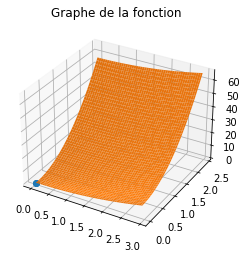

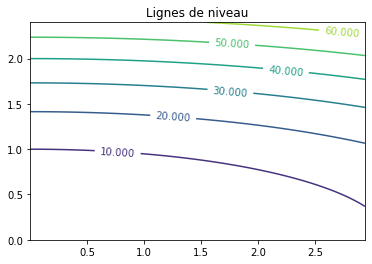

In [133]:
print("-------------------------------------------------------")
print("Affichage avec le domaine dom=[X1min,X1max,X2min,X2max]")
print("-------------------------------------------------------")
plot_fun(f_allY,dom)



-------------------------------------------------------
Affichage avec le domaine dom2=[-10,10,-10,10]
-------------------------------------------------------
valeur du minimum sur la grille :  0.027777076336455164
position du minimiseur : ( -0.05025125628140614 , -0.05025125628140614 )


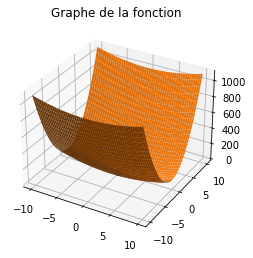

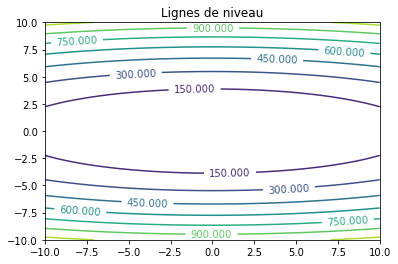

In [134]:
print("-------------------------------------------------------")
print("Affichage avec le domaine dom2=[-10,10,-10,10]")
print("-------------------------------------------------------")

plot_fun(f_allY,dom2)

## 4) Affichage des valeurs f(Xk)-f(X*) :

### 4.1) f1 :

------------descente_gradient_pas_fixe_2-------------


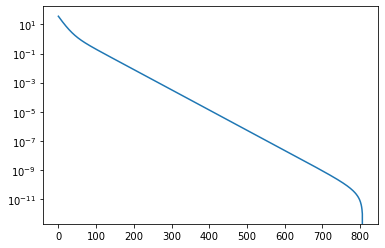

In [135]:
import matplotlib.pyplot as plt 

#---------   descente_gradient_pas_fixe_2 de f1 -------------
X = XVector(3, 3)
print("------------descente_gradient_pas_fixe_2-------------")
X, f1X = descente_gradient_pas_fixe_2(f1, X)

X1min=X[-1]['x1']
X2min=X[-1]['x2']

plt.semilogy(f1X['Y']-f1(X1min,X2min))


### 4.2) f2 :

------------descente_gradient_pas_fixe_2-------------


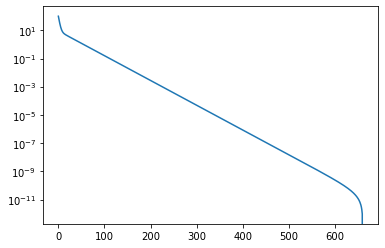

In [136]:
#---------   descente_gradient_pas_fixe_2 de f2 -------------
X = XVector(3, 3)
print("------------descente_gradient_pas_fixe_2-------------")
X, f2X = descente_gradient_pas_fixe_2(f2, X)

X1min=X[-1]['x1']
X2min=X[-1]['x2']

plt.semilogy(f2X['Y']-f2(X1min,X2min))

## 5) descente de gradient avec la méthode de rebroussement : 

In [137]:

import numpy as np
#--------------           test f2            ----------------
def f2(x1,x2):
    return ((x1)**2+10*(x2)**2)


def dfx1 (x): 
    return (2*x)

def dfx2 (x): 
    return (20*x)

x0 = XVector(3,3)
Xhistory = Table(names=('x1', 'x2', 'ETAPE'), dtype=('f8', 'f8', 'i4'))
Xhistory.add_row((x0.x1, x0.x2, 0))
Yhistory = Table(names=('Y', 'ETAPE'), dtype=('f8', 'i4'))
Yhistory.add_row((f2(Xhistory[0]['x1'],Xhistory[0]['x2']), 0)) #  cette ligne pour imprimer les itérations

def descente_gradient_rebr(x0, dfx1, dfx2, t=1,alpha=0.1, beta=0.7, eps=1e-5):
    count = 1
    Xhistory.add_row((x0.x1-t*dfx1(x0.x1), x0.x2-t*dfx2(x0.x2), 0))   
    while (f2(x0.x1,x0.x2) - (f2(x0.x1-t*dfx1(x0.x1), x0.x2-t*dfx2(x0.x2))) + alpha * t * np.linalg.norm(np.array([dfx1(x0.x1), dfx2(x0.x2)]))**2) < 0:
       # while (f2(x0.x1,x0.x2) - (f2(x0.x1-t*dfx1(x0.x1), x0.x2-t*dfx2(x0.x2))) + alpha * t * np.dot(np.array([dfx1(x0.x1), dfx2(x0.x2)]), np.array([dfx1(x0.x1), dfx2(x0.x2)]))) < 0:
    
        Xhistory.add_row((x0.x1-t*dfx1(x0.x1), x0.x2-t*dfx2(x0.x2), format(count)))
        Yhistory.add_row((f2(Xhistory[count]['x1'],Xhistory[count]['x2']), count)) #  cette ligne pour imprimer les itérations
        t *= beta
        print("Inequality: ",  f2(x0.x1,x0.x2) - (f2(x0.x1-t*dfx1(x0.x1), x0.x2-t*dfx2(x0.x2))) + alpha * t * np.linalg.norm(np.array([dfx1(x0.x1), dfx2(x0.x2)]))**2)
        count += 1
#         if(t < eps) :
#             break
    return t,Xhistory,Yhistory,count

t ,Xhis,Yhistory,count = descente_gradient_rebr(x0, dfx1, dfx2)

print("\nfinal step size :",  t)
print("\nfinal iter :",  count)
Xhis

Inequality:  -14857.92
Inequality:  -6692.439599999997
Inequality:  -2867.736563999999
Inequality:  -1117.099728359999
Inequality:  -345.7150352963994
Inequality:  -28.23568517523583
Inequality:  84.97979174813443

final step size : 0.08235429999999996

final iter : 8


x1,x2,ETAPE
float64,float64,int32
3.0,3.0,0
-3.0,-57.0,0
-3.0,-57.0,1
-1.1999999999999993,-39.0,2
0.0600000000000005,-26.399999999999995,3
0.9420000000000006,-17.579999999999995,4
1.5594000000000006,-11.405999999999995,5
1.9915800000000004,-7.084199999999996,6
2.294106,-4.058939999999997,7


### - Interprétation des résultats:

## 6) calcul de la matrice héssienne pour la fonction f2 : 

In [140]:
def hessf2(x): 
    def f2(x1,x2):
        return ((x1)**2+10*(x2)**2)
    def dfx1 (x1): 
        return (2*x1)
    def dfsqrx1 (x1): 
        return (2)

    def dfx2 (x2): 
        return (20*x2)
    def dfsqrx2 (x2): 
        return (20)

    def dfx1x2 (x): 
        return (0)

    def dfx2x1 (x): 
        return (0)
    return np.array([[dfsqrx1(x), dfx1x2(x)], [dfx2x1(x), dfsqrx2(x)]]) 
x0 = XVector(3, 3)
print("----------Matrice hessienne de la fonction f2 :-----------")
print("Hf2(X)  : " )
print(hessf2(x0))

----------Matrice hessienne de la fonction f2 :-----------
Hf2(X)  : 
[[ 2  0]
 [ 0 20]]


## 7) Descente de Newton

In [141]:
def gradf2(x1,x2):
        def dfx1 (x1): 
            return (2*x1)
        def dfx2 (x2): 
            return (20*x2)
        return dfx1(x1),dfx2(x2)
def newton_descent(f, grad, hessian, x0,alpha=0.1, beta=0.7, eps=1e-5):
    #dim = np.max(np.shape(x0))
    Xhistory = Table(names=('x1', 'x2', 'ETAPE'), dtype=('f8', 'f8', 'i4'))
    Yhistory = Table(names=('Y', 'ETAPE'), dtype=('f8', 'i4'))
    f_list = np.zeros([])
    error_point_list = np.zeros(1000)
    error_grad_list = np.zeros(1000)
    x = np.array([x0.x1,x0.x2])
    xtmp = x0
    x_old = x
    i = 0
    h ,Xhis,Yh,count = descente_gradient_rebr(xtmp, dfx1, dfx2, t ,alpha,beta,eps)
    M = hessian(x)
    descent = np.linalg.solve(M, grad(x[0],x[1]))
    x = x - h*descent
    while True :
        x_old = x
        h ,Xhis,Yh,count = descente_gradient_rebr(xtmp, dfx1, dfx2, t ,alpha,beta,eps)
        M = hessian(x)
        descent = np.linalg.solve(M, grad(x[0],x[1]))
        x = x - h*descent
        xtmp.x1 = x[0]
        xtmp.x2 = x[1]
        Xhistory.add_row((xtmp.x1, xtmp.x2, i))
        grad_x = grad(x[0],x[1])
        f_x = f(x[0],x[1])
        Yhistory.add_row((f_x, i))
        error_point_list[i] = np.linalg.norm(x - x_old)
        i+=1
        if(x_old[1] - x[1] < eps) :
            break
    return  x,Xhistory

### 7.1) test de la descente de newton avec la fonction f2 : 

In [142]:
x0 = XVector(3, 3)
xmin,X_list = newton_descent(f2, gradf2, hessf2, x0)
print(xmin)
print("X_list")
print(X_list)

[0.00010851 0.00010851]
X_list
          x1                     x2           ETAPE
---------------------- ---------------------- -----
    2.5262208921854703     2.5262208921854703     0
    2.3181757389641606     2.3181757389641606     1
    2.1272639987047843     2.1272639987047843     2
     1.952074661176251      1.952074661176251     3
    1.7913129189073438     1.7913129189073438     4
    1.6437905973897728     1.6437905973897728     5
    1.5084173733951562     1.5084173733951562     6
    1.3841927165013597     1.3841927165013597     7
    1.2701984942687918     1.2701984942687918     8
    1.1655921864122316     1.1655921864122316     9
                   ...                    ...   ...
 0.0002562712860174127  0.0002562712860174124   107
0.00023516624364734888 0.00023516624364734864   108
0.00021579929226814203  0.0002157992922681418   109
0.00019802729261290378 0.00019802729261290356   110
0.00018171889354887293 0.00018171889354887274   111
0.00016675356127388098 0.00016675

### 7.2) Interprétation des résultats :

## 8) Gradient conjugué :

In [143]:
import numpy as np

def conjgrad(A, b, c, x , eps=1e-5):
    """
    A function to solve [A]{x} = {b} linear equation system with the 
    conjugate gradient method.
    More at: http://en.wikipedia.org/wiki/Conjugate_gradient_method
    ========== Parameters ==========
    A : matrix 
        A real symmetric positive definite matrix.
    b : vector
        The right hand side (RHS) vector of the system.
    x : vector
        The starting guess for the solution.
    """  
    r = b - np.dot(A, x)
    p = r
    rsold = np.dot(np.transpose(r), r)
    
    for i in range(len(b)):
        Ap = np.dot(A, p)
        alpha = rsold / np.dot(np.transpose(p), Ap)
        x = x + np.dot(alpha, p)
        r = r - np.dot(alpha, Ap)
        rsnew = np.dot(np.transpose(r), r)
        if np.sqrt(rsnew) < eps:
            break
        p = r + (rsnew/rsold)*p
        rsold = rsnew
    return x

### 8.1) Test de la fonction Gradient conjugué avec la fonction f2 :

### - Q(s,y)= ax^{2} + bxy + cy^{2} + dx + ey + f 
##### Delta = b^2-4ac, 
#####           |2ax + by + d = 0_______(2a     b )_(x)___(-d)
#####           |bx + 2cy + e = 0_______(b     2c )_(y)___(-e)
###  - on l'applique sur la fonction f2
##### f2(x1,x2) = x1^{2} + 10x2^{2}
##### (2     0 )_(x)___(0)
##### (0     20 )_(y)___(0)


In [146]:
#----------------test----------------------
print("-----------test sur f2--------------")
x=np.array([3,3])
A=np.array([[2,0],[0,20]])
b=np.array([0,0]) 
c=0
sol = conjgrad(A, b, c, x)
print("-------------Xmin-------------------")
print(sol)

-----------test sur f2--------------
-------------Xmin-------------------
[ 0.00000000e+00 -2.08513762e-15]


### Interprétation des résultats


# EXERCICE 2

## 1) Démonstration de : la fonction f3 peut s'écrire f3= u o v : 

### f3=U°V
### u(x1,x2) = Ax+b
##### A = ((1,3),(1,-3),(-1,0))
##### X = (x1,x2)
##### b = (-0.1,-0.1,-0.1)
##### X =_______|x1  + 3x2 - 0.1________(1___3 )_(x1)___(-0.1)
##### Y =_______|x1  - 3x2 - 0.1________(1___-3 )_(x2)___(-0.1)
##### Z =_______|-x1 - 0.1____________(-1___0 )_______(-0.1)
### v(X,Y,Z) = exp(X)+exp(Y)+exp(Z)


## 2) Gradf3(x) :

In [165]:
def Gradf3(x1,x2):
    e1 = math.exp(x1+(3*x2)-0.1)
    e2 = math.exp(x1-(3*x2)-0.1)
    e3 = -math.exp(-x1-0.1)
    
    e4 = 3*math.exp(x1+(3*x2)-0.1)
    e5 = -3*math.exp(x1-(3*x2)-0.1)
    
    return e1+e2+e3,e4+e5


def hessf3(X):
    def Gradf3sqrx1(X):
        e1 = math.exp(X[0]+(3*X[1])-0.1)
        e2 = math.exp(X[0]-(3*X[1])-0.1)
        e3 = math.exp(-X[0]-0.1)
        return e1+e2+e3 

    def Gradf3sqrx2(X):
        e1 = 9*math.exp(X[0]+(3*X[1])-0.1)
        e2 = 9*math.exp(X[0]-(3*X[1])-0.1)
        return e1+e2

    def Gradf3x1x2(X):
        e1 = 3*math.exp(X[0]+(3*X[1])-0.1)
        e2 = -3*math.exp(X[0]-(3*X[1])-0.1)
        return e1+e2

    def Gradf3x2x1(X):
        e1 = 3*math.exp(X[0]+(3*X[1])-0.1)
        e2 = -3*math.exp(X[0]-(3*X[1])-0.1)
        return e1+e2
    
    return np.array([[Gradf3sqrx1(X), Gradf3x1x2(X)], [Gradf3x2x1(X), Gradf3sqrx2(X)]]) 
x0 = np.array([3, 2])
x= XVector(3,2)
print("--- Matrice hessienne de la fonction f3 ---")
print(hessf3(x0))

--- Matrice hessienne de la fonction f3 ---
[[ 7332.06363756 21995.78546986]
 [21995.78546986 65988.16729523]]


## 3) Convexité de f3 :

## 4) Plot de la fonction f3 :

In [162]:
import math
def f3(x1,x2):
    e1 = math.exp(x1+(3*x2)-0.1)
    e2 = math.exp(x1-(3*x2)-0.1)
    e3 = math.exp(-x1-0.1)
    return e1+e2+e3
x0 = np.array([3, 3])
k = f3(x0[0],x0[1]) 

        x1                  x2        
------------------ -------------------
              -2.0                -1.0
              -2.0               -0.95
              -2.0 -0.8999999999999999
              -2.0 -0.8499999999999999
              -2.0 -0.7999999999999998
              -2.0 -0.7499999999999998
              -2.0 -0.6999999999999997
              -2.0 -0.6499999999999997
              -2.0 -0.5999999999999996
              -2.0 -0.5499999999999996
               ...                 ...
0.9500000000000028  0.4500000000000013
0.9500000000000028  0.5000000000000013
0.9500000000000028  0.5500000000000014
0.9500000000000028  0.6000000000000014
0.9500000000000028  0.6500000000000015
0.9500000000000028  0.7000000000000015
0.9500000000000028  0.7500000000000016
0.9500000000000028  0.8000000000000016
0.9500000000000028  0.8500000000000016
0.9500000000000028  0.9000000000000017
0.9500000000000028  0.9500000000000017
Length = 2400 rows
[44.    10.025]
valeur du minimum sur la gril

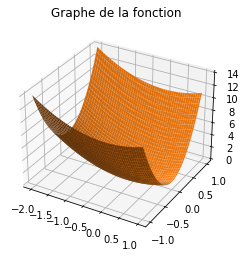

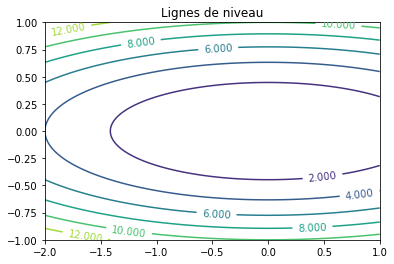

In [163]:
import numpy as np
def f_allY1(X):
    tmp = []
    for i in range(len(X[0])):
        tmp.append (f2(X[0][i],X[1][i]))
    return np.array(tmp)

def Xs():
    Xhistory = Table(names=('x1', 'x2'), dtype=('f8', 'f8'))
    for x1 in np.arange(-2.0,1.0,0.05):
        for x2 in np.arange(-1.0,1.0,0.05):
            Xhistory.add_row((x1, x2))
    return Xhistory
dom=[-2,1,-1,1]
k = Xs()
print(k)
print(f_allY(k))

plot_fun(f_allY1,dom)


### - Interpretation du graphe de la fonction f3 :

## 5) test de descente de gradient avec rebroussement et la méthode de newton avec la fonction f3 :

In [174]:
x= XVector(3,2)
xmin,xh = newton_descent(f3, Gradf3, hessf3, x,alpha=0.1, beta=0.7, eps=1e-5)
print("---------------------- Xmin --------------------------")
print(xmin)
print("------------------------------------------------------")
print("")
print("------------------ Liste des x -----------------------")
print(xh)
print("------------------------------------------------------")

---------------------- Xmin --------------------------
[-3.46414612e-01  1.05985438e-04]
------------------------------------------------------

------------------ Liste des x -----------------------
         x1                    x2           ETAPE
-------------------- ---------------------- -----
   2.902945786247249        1.9774488247209     0
   2.856992538258338     1.9653153114232658     1
  2.8126375911729493     1.9526490521102293     2
   2.769785280520816      1.939481937296645     3
   2.728337021533299     1.9258468312023218     4
   2.688193478674036     1.9117768486083244     5
  2.6492563754091103      1.897304751636997     6
  2.6114299430946333      1.882462466830161     7
  2.5746220297342113     1.8672807156084832     8
  2.5387449030915885       1.85178874661746     9
                 ...                    ...   ...
 -0.3461981974451841 0.00025026112984386894   187
-0.34622910105258925 0.00022965878752108574   188
 -0.3462574614474893 0.00021075191504146742   189


# EXERCICE 3 :

## 1) Test du descente du gradient avec rebroussement et gradient conjugué avec f:

In [175]:
import scipy.linalg

n = 100
A = scipy.linalg.toeplitz(np.hstack([2, -1, np.zeros(n-2)])) * (n+1)**2
t = np.linspace(1/(n+1), 1-1/(n+1),n).T
b = t * (1-t) * np.exp(-t)

def f(x):
    return 0.5 * np.dot(A@x,x) - np.dot(b,x)

def gradf(x):
    return A @ x - b

xstar = np.linalg.solve(A,b)

x0 = np.ones(b.shape)/40 + np.random.random_sample(b.shape)/50
eps = 10**(-4)

### - Affichage de la donnée x0 :

In [176]:
x0

array([0.03232523, 0.03998574, 0.0253875 , 0.03519863, 0.02761841,
       0.02912725, 0.03645139, 0.03449439, 0.03559599, 0.03137366,
       0.04162129, 0.03266623, 0.03130753, 0.0266402 , 0.03425492,
       0.03835692, 0.02853833, 0.03919362, 0.03497537, 0.04430137,
       0.02565688, 0.02554329, 0.02583817, 0.03464643, 0.04090657,
       0.02720171, 0.02506106, 0.03982645, 0.04030249, 0.0285277 ,
       0.04071868, 0.04415298, 0.03191584, 0.02819785, 0.03138509,
       0.03443576, 0.03484552, 0.03157486, 0.03757622, 0.04233809,
       0.02846815, 0.04037997, 0.03022745, 0.03557027, 0.03185621,
       0.0339054 , 0.02603864, 0.04440679, 0.02549683, 0.03635775,
       0.04048531, 0.03837393, 0.02871447, 0.04051382, 0.04443663,
       0.03626712, 0.03485305, 0.04344104, 0.03818043, 0.03022125,
       0.04424049, 0.03238277, 0.02567057, 0.03131365, 0.02526658,
       0.03111177, 0.03773257, 0.02788389, 0.03282718, 0.03855835,
       0.03698051, 0.04193834, 0.02576818, 0.04364004, 0.04253

### - Affichage de la solution ' xstar ' du système d'équation : 

In [177]:
print("-------------------------- Affichage de xstar-------------------------")
print(xstar)
print("----------------------------------------------------------------------")
print("")
print("----------------------------------------------------------------------")
print("Valeur de f pour la solution exacte xstar :",f(xstar))
print("----------------------------------------------------------------------")

-------------------------- Affichage de xstar-------------------------
[0.00056392 0.0011269  0.001688   0.00224637 0.00280115 0.00335154
 0.00389677 0.0044361  0.00496882 0.00549426 0.00601179 0.00652078
 0.00702066 0.00751087 0.0079909  0.00846024 0.00891842 0.00936501
 0.00979958 0.01022175 0.01063114 0.01102743 0.01141028 0.0117794
 0.01213452 0.01247538 0.01280176 0.01311344 0.01341023 0.01369197
 0.0139585  0.01420969 0.01444542 0.01466559 0.01487013 0.01505898
 0.01523208 0.0153894  0.01553093 0.01565667 0.01576663 0.01586084
 0.01593933 0.01600217 0.01604942 0.01608115 0.01609747 0.01609848
 0.01608428 0.01605501 0.01601081 0.01595181 0.01587818 0.01579009
 0.01568771 0.01557122 0.01544082 0.01529672 0.01513912 0.01496824
 0.01478431 0.01458757 0.01437824 0.01415659 0.01392286 0.01367732
 0.01342023 0.01315186 0.01287249 0.01258241 0.0122819  0.01197126
 0.01165078 0.01132076 0.01098152 0.01063336 0.01027659 0.00991154
 0.00953853 0.00915787 0.00876991 0.00837496 0.00797337 0.0

In [178]:
def descente_gradient_rebr_2(x0, df, t=1,alpha=0.1, beta=0.7, eps=1e-5):
    count = 1
    #Xhistory.add_row((x0-t*df(x0), 0))   
    while (f(x0) - (f(x0-t*df(x0)) + alpha * t * np.linalg.norm(np.array([df(x0)]))**2)) < 0:
        #Xhistory.add_row((x0-t*df(x0), format(count)))
        #Yhistory.add_row((f(Xhistory[count]['x']), count)) #  cette ligne pour imprimer les itérations
        t *= beta
        print("Inequality: ",  f(x0) - (f(x0-t*df(x0)) + alpha * t * np.linalg.norm(np.array([df(x0)]))**2))
        count += 1

    return t,count,x0-t*df(x0)

### 1.1) test de la descente de gradient avec rebroussement pour f :

In [179]:
h,count,k= descente_gradient_rebr_2(x0, gradf,eps)
print("--------------------------------------------------------------------")
print("----------- Solution de la descente avec rebroussement -------------")
print("")
print(k)
print("--------------------------------------------------------------------")
print("--------------------------------------------------------------------")
print("Valeur de f pour xmin :",f(k))
print("--------------------------------------------------------------------")

Inequality:  -37.47985418398642
Inequality:  15.41876951852845
--------------------------------------------------------------------
----------- Solution de la descente avec rebroussement -------------

[0.01999707 0.02886066 0.03758987 0.02650737 0.03216376 0.0320366
 0.03181517 0.03602653 0.03293847 0.03861041 0.03202711 0.03646781
 0.02965855 0.03278446 0.03250443 0.0314043  0.03877798 0.0317651
 0.04175165 0.03032674 0.03492609 0.02575418 0.03010044 0.03337975
 0.03093421 0.03298931 0.03351887 0.03269137 0.03418645 0.04051456
 0.03634933 0.03632735 0.0361819  0.03165724 0.03132467 0.03312357
 0.03301375 0.03621736 0.03696456 0.03303289 0.04136301 0.02935898
 0.0379806  0.03105099 0.03474472 0.02895663 0.03915979 0.02578096
 0.04038531 0.03299955 0.03737418 0.03460834 0.03944787 0.03658388
 0.03839935 0.03965077 0.03985942 0.03652558 0.03683819 0.04121367
 0.03131232 0.03496104 0.03185251 0.02547638 0.03121682 0.03150523
 0.02950595 0.03528314 0.03322636 0.03491016 0.04025242 0.03138

### 1.2) test de la descente de gradient conjugué pour f :

In [180]:
#----------------conjgrad----------------------
print("--------------------------conjgrad sur f-------------------------")
print("")
c=0
sol = conjgrad(A, b, c, x0)
print("--------------------Solution par conjgrad------------------------")
print("")
print(sol)
print("")
print("--------------------------------------------------------------------")
print("Valeur de f pour xmin :",f(sol))
print("--------------------------------------------------------------------")

--------------------------conjgrad sur f-------------------------

--------------------Solution par conjgrad------------------------

[0.00056392 0.0011269  0.001688   0.00224637 0.00280115 0.00335154
 0.00389677 0.0044361  0.00496882 0.00549426 0.00601179 0.00652078
 0.00702066 0.00751087 0.0079909  0.00846024 0.00891842 0.00936501
 0.00979958 0.01022175 0.01063114 0.01102743 0.01141028 0.0117794
 0.01213452 0.01247538 0.01280176 0.01311344 0.01341023 0.01369197
 0.0139585  0.01420969 0.01444542 0.01466559 0.01487013 0.01505898
 0.01523208 0.0153894  0.01553093 0.01565667 0.01576663 0.01586084
 0.01593933 0.01600217 0.01604942 0.01608115 0.01609747 0.01609848
 0.01608428 0.01605501 0.01601081 0.01595181 0.01587818 0.01579009
 0.01568771 0.01557122 0.01544082 0.01529672 0.01513912 0.01496824
 0.01478431 0.01458757 0.01437824 0.01415659 0.01392286 0.01367732
 0.01342023 0.01315186 0.01287249 0.01258241 0.0122819  0.01197126
 0.01165078 0.01132076 0.01098152 0.01063336 0.01027659 0.00991

## 2) Plot de la solution de l'algorithme et la solution du système d'équations :

In [181]:
print("-------------------------------------------------------------------------------------------")
print("Descente avec méthode de rebroussement : valeur de f pour xmin est : ",f(k))
print("-------------------------------------------------------------------------------------------")
print("Descente de gradient conjugué : valeur de f pour xmin est : ",f(sol))
print("-------------------------------------------------------------------------------------------")
print("Solution du système d'équations : valeur de f pour xmin est : ",f(xstar))
print("-------------------------------------------------------------------------------------------")


-------------------------------------------------------------------------------------------
Descente avec méthode de rebroussement : valeur de f pour xmin est :  23.195229437489747
-------------------------------------------------------------------------------------------
Descente de gradient conjugué : valeur de f pour xmin est :  -0.06542297081256629
-------------------------------------------------------------------------------------------
Solution du système d'équations : valeur de f pour xmin est :  -0.06542297081256643
-------------------------------------------------------------------------------------------


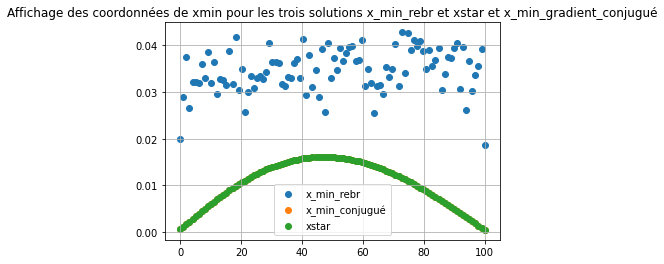

In [182]:
# import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(0,100,100)
plt.scatter(x, k, label='x_min_rebr')
plt.scatter(x, xstar, label='x_min_conjugué')
plt.scatter(x, xstar, label='xstar')
plt.legend()
plt.title('Affichage des coordonnées de xmin pour les trois solutions x_min_rebr et xstar et x_min_gradient_conjugué')
plt.grid(True)
plt.show()



## 3) Interprétation des résultats :

Comparaison: Avec la méthode de conjugué on a obtenu une solution exacte où f(xmin)=-0.065 (la meme que xtar la solution excate qui a été déja donné),parcontre avec la méthode de rebroussement on a trouvé une approximation f(xmin) = 22.58, le graphe affiché ci-dessus confirme nos résultats.
Donc on peut dire que la méthode de conjugué est la plus précise.


# Conclusion: